In [6]:
%matplotlib inline

In [55]:
from bifrost.fdmt import Fdmt
import numpy as np
import pylab as plt
import bifrost as bf

from astropy import units as u

import matplotlib.pyplot as plt

import hyperseti

import blimpy as bl

fdmt = Fdmt()

fp = '/datax2/users/icrar2021/cho134/data/Parkes_57776_55564_J0835-4510_time.h5'
fil = bl.Waterfall(fp, t_stop=2048)
fil.data = fil.data[:, 0:1, :]

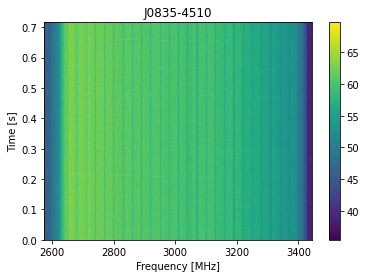

In [56]:
#fil.data /= fil.data.mean(axis=0)
fil.plot_waterfall()

0.3662109375

--- File Info ---
DIMENSION_LABELS :   ['frequency' 'feed_id' 'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                2574.03515625 MHz
            foff :                 0.3662109375 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                             2376
            nifs :                                1
     source_name :                       J0835-4510
         src_dej :                   -4449:00:25.12
         src_raj :                      8:35:20.611
    telescope_id :                                6
           tsamp :            0.0003495253333333333
   tstart (ISOT) :          2017-01-23T15:26:04.000
    tstart (MJD) :                57776.64310185185
        za_start :                              0.0

Num ints in file :                           858112
      File shape :             

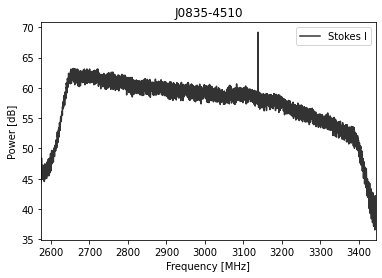

In [57]:
print(fil.header["foff"])
fil.info()
fil.plot_spectrum(logged=True)

In [58]:
max_delay = 128
gulp_size = 4 * 8192

def get_gulp(idx):
    d_cpu = np.ascontiguousarray(np.expand_dims(fil.data.squeeze().T, axis=0)[..., idx * gulp_size:(idx+1) * gulp_size])
    return d_cpu

d_cpu = get_gulp(0)
print(d_cpu.shape)

## Initialize FDMT
n_disp = max_delay
n_time = d_cpu.shape[2]
n_chan = d_cpu.shape[1]
fdmt.init(n_chan, n_disp, fil.header['fch1'], fil.header['foff'], space="cuda")

print(d_cpu.shape)

# Input shape is (1, n_freq, n_time)
d_in = bf.ndarray(d_cpu, dtype='f32', space='cuda')
d_out = bf.ndarray(np.zeros(shape=(1, n_disp, n_time)), dtype='f32', space='cuda')

print(d_in.shape, d_out.shape)
print(n_chan, n_time, n_disp, n_time)

# Execute FDMT
fdmt.execute(d_in, d_out, negative_delays=False)

d_out = d_out.copy(space='system')


(1, 2376, 2048)
(1, 2376, 2048)
(1, 2376, 2048) (1, 128, 2048)
2376 2048 128 2048


/tmp/ipykernel_30473/927468506.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.array(d_out)).squeeze(), aspect='auto')


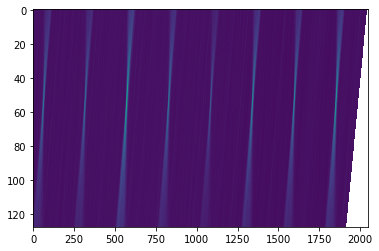

In [59]:
plt.imshow(np.log(np.array(d_out)).squeeze(), aspect='auto')